# **Proyecto 2**
El propósito de este proyecto es que los estudiantes apliquen los conocimientos adquiridos en análisis exploratorio de datos, normalización y limpieza de datos y modelos de aprendizaje automático.

## Importacion de librerias

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


En este proyecto se utilizaran 5 criptomonedas, se unifican en un solo dataframe para mejor manejo.

In [ ]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237 entries, 0 to 14236
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        14237 non-null  int64  
 1   Name       14237 non-null  object 
 2   Symbol     14237 non-null  object 
 3   Date       14237 non-null  object 
 4   High       14237 non-null  float64
 5   Low        14237 non-null  float64
 6   Open       14237 non-null  float64
 7   Close      14237 non-null  float64
 8   Volume     14237 non-null  float64
 9   Marketcap  14237 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [118]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,14237.000000,14237.000000,14237.000000,14237.000000,14237.000000,1.423700e+04,1.423700e+04
mean,1428.104657,1473.171913,1385.410912,1431.543204,1433.903150,2.931096e+09,2.854483e+10
std,828.595692,6023.977616,5633.359206,5843.662241,5849.866047,9.838238e+09,1.080647e+11
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.279606e+06
25%,712.000000,0.009090,0.008468,0.008776,0.008785,1.118660e+06,1.692081e+08
50%,1424.000000,3.684380,3.554500,3.619410,3.619560,4.049150e+07,1.252517e+09
75%,2136.000000,141.350006,131.951996,136.920871,136.943696,9.647478e+08,8.903292e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Eliminacion de la hora en la variable date

In [119]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237 entries, 0 to 14236
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        14237 non-null  int64  
 1   Name       14237 non-null  object 
 2   Symbol     14237 non-null  object 
 3   Date       14237 non-null  object 
 4   High       14237 non-null  float64
 5   Low        14237 non-null  float64
 6   Open       14237 non-null  float64
 7   Close      14237 non-null  float64
 8   Volume     14237 non-null  float64
 9   Marketcap  14237 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


### Visualizacion de datos nulos

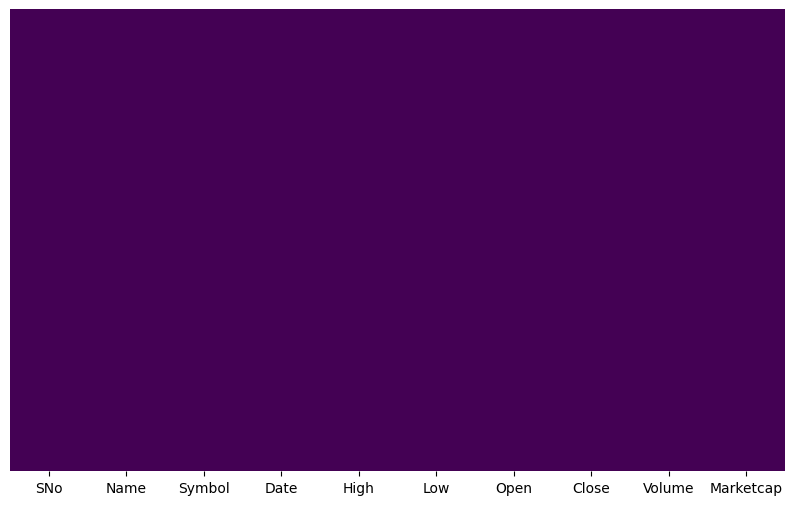

In [120]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

## Deteccion y eliminacion de valores atipicos
Histograma de precio criptomonedas

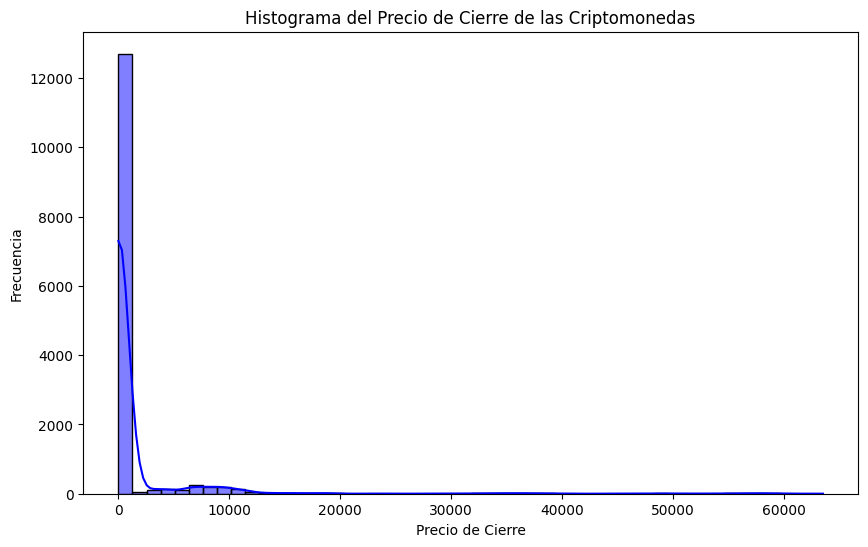

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Calculamos el rango intercuartil para filtrar los valores extremos

In [122]:
Q1, Q3 = df['Close'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lim_inferior, lim_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(f"Limite Inferior: {lim_inferior}, Limite Superior: {lim_superior}")

Limite Inferior: -205.39358195003155, Limite Superior: 342.3460625300189


In [123]:
df[(df['Close'] < lim_inferior) | (df['Close'] > lim_superior)]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
196,197,Bitcoin,BTC,2013-11-11,351.269989,311.779999,325.410004,342.440002,0.000000e+00,4.101635e+09
197,198,Bitcoin,BTC,2013-11-12,362.809998,342.799988,343.059998,360.329987,0.000000e+00,4.317726e+09
198,199,Bitcoin,BTC,2013-11-13,414.049988,359.799988,360.970001,407.369995,0.000000e+00,4.883103e+09
199,200,Bitcoin,BTC,2013-11-14,425.899994,395.190002,406.410004,420.200012,0.000000e+00,5.038818e+09
200,201,Bitcoin,BTC,2013-11-15,437.890015,396.109985,419.410004,417.950012,0.000000e+00,5.013561e+09
...,...,...,...,...,...,...,...,...,...,...
11288,2547,Monero,XMR,2021-05-12,477.724539,392.382942,453.210496,392.382942,6.405530e+08,7.026799e+09
11289,2548,Monero,XMR,2021-05-13,420.875162,370.651484,396.697546,402.357494,6.245636e+08,7.205723e+09
11290,2549,Monero,XMR,2021-05-14,421.958304,397.716095,402.503803,412.540420,4.221743e+08,7.388375e+09
11291,2550,Monero,XMR,2021-05-15,440.824301,382.015480,412.669822,382.398896,6.744898e+08,6.848862e+09


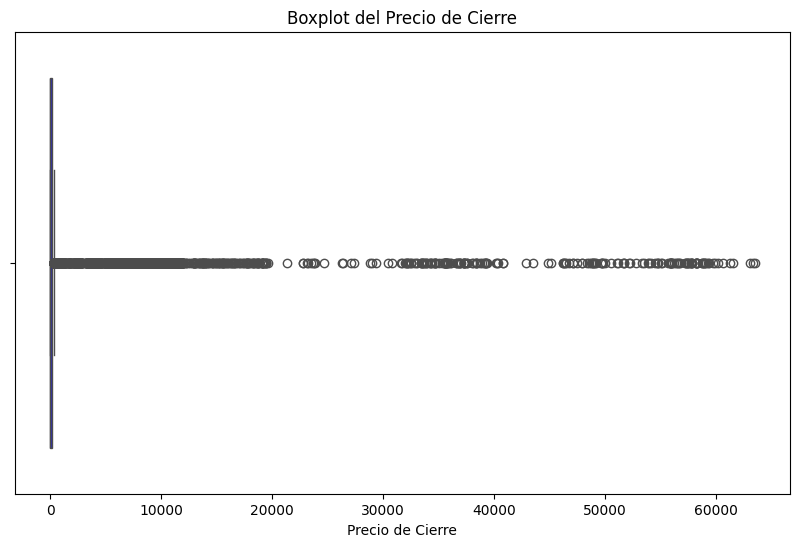

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='blue')
plt.title('Boxplot del Precio de Cierre')
plt.xlabel('Precio de Cierre')
plt.show()

In [125]:
df = df[(df['Close'] >= lim_inferior) & (df['Close'] <= lim_superior)]

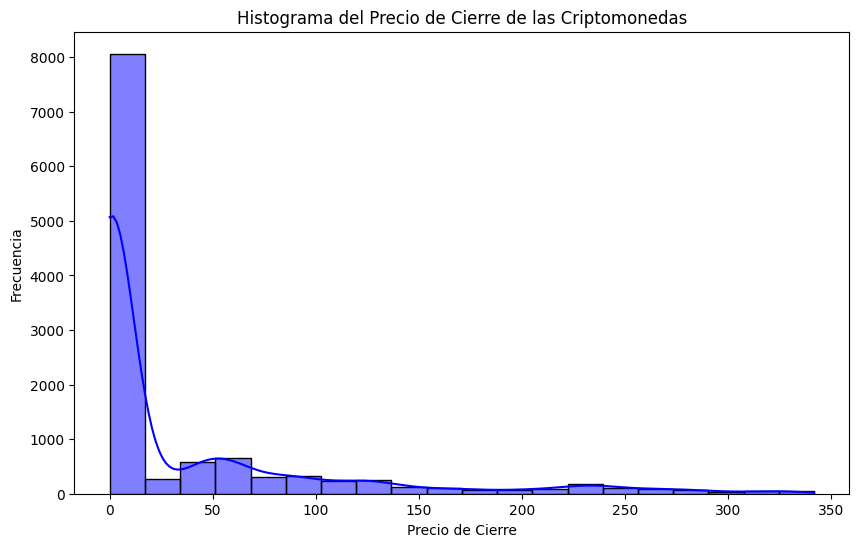

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Histograma de Marketcap

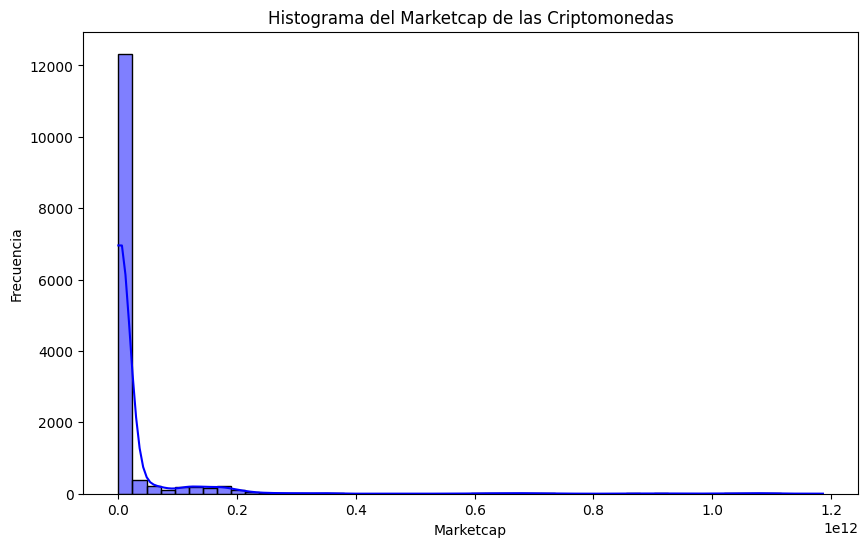

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'], bins=50, kde=True, color='blue')
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap')
plt.ylabel('Frecuencia')
plt.show()